# Netflix Data Analysis Project (EDA)

This project explores Netflix's Movies and TV Shows dataset using Python.
The aim is to understand content distribution, release trends, and genre patterns.


## Project Objectives

The main objectives of this analysis are:

1. To analyze the distribution of Movies and TV Shows on Netflix.
2. To identify trends in content addition over the years.
3. To explore the top contributing countries and genres.
4. To study rating patterns and audience targeting.
5. To gain insights into Netflix’s content strategy using visualizations.


## Tools & Technologies Used

- Python
- Pandas, NumPy
- Matplotlib, Seaborn
- Jupyter Notebook


## Dataset Information

Dataset: Netflix Movies and TV Shows  
Source: Kaggle  
Total Records: ~8800  
Features include: title, type, country, rating, duration, date_added, listed_in


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
plt.style.use("ggplot")

In [9]:
#Loading Dataset
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
#Dataset Information
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
#Checking Missing Values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
#Filling Missing Values
df['director'].fillna("Not Available", inplace=True)
df['cast'].fillna("Not Available", inplace=True)
df['country'].fillna("Unknown", inplace=True)
df.dropna(subset=['date_added'], inplace=True)

In [14]:
#Convert Date Column
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df = df.dropna(subset=['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [15]:
df[['date_added', 'year_added', 'month_added']].sample(5)

,date_added,year_added,month_added
8486,2020-01-01,2020,1
7087,2018-11-07,2018,11
6552,2016-12-20,2016,12
270,2021-08-13,2021,8
356,2021-08-01,2021,8


## VISUALIZATIONS

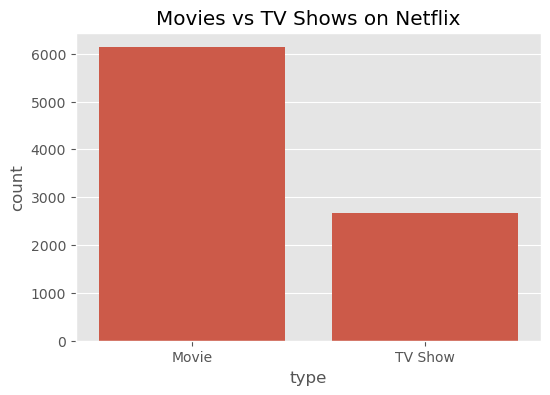

In [17]:
#Movies vs TV Shows Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows on Netflix")
plt.show()

### Netflix has more Movies than TV Shows, showing stronger focus on movie content.

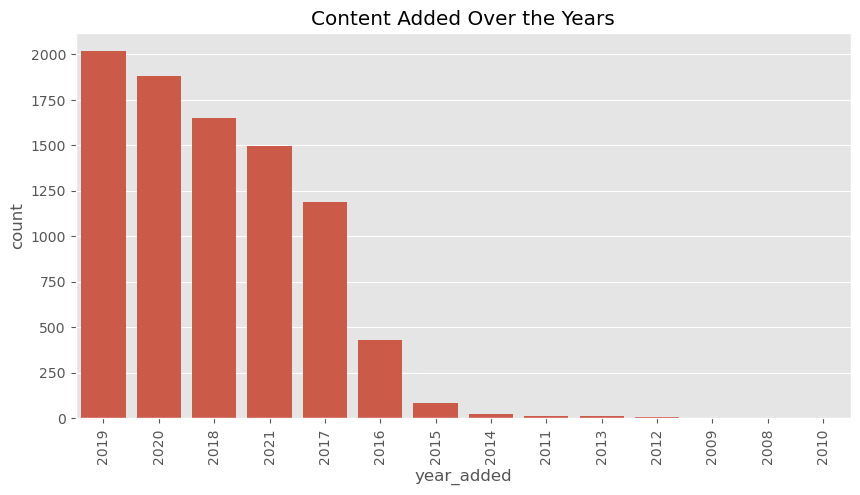

In [18]:
#Content Added Over the Years
plt.figure(figsize=(10,5))
sns.countplot(x='year_added', data=df, order=df['year_added'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Content Added Over the Years")
plt.show()

### Netflix rapidly expanded its content library after 2016.

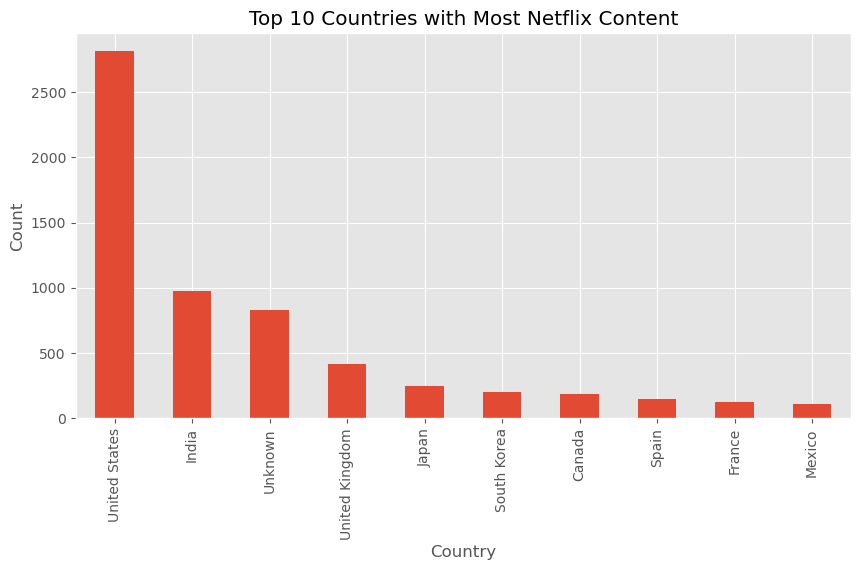

In [19]:
#Top 10 Countries Producing Content
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind='bar')
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

### The US and India are among the biggest content contributors.

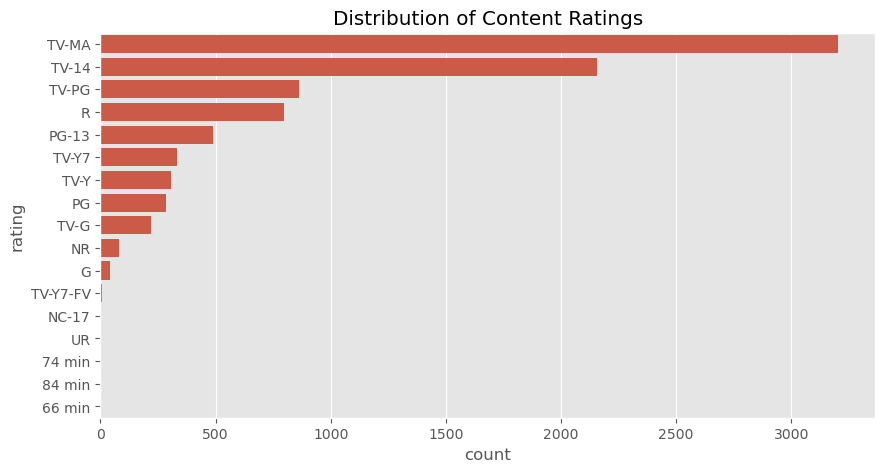

In [20]:
#Most Common Ratings
plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title("Distribution of Content Ratings")
plt.show()

### Most Netflix content is targeted towards mature audiences (TV-MA).

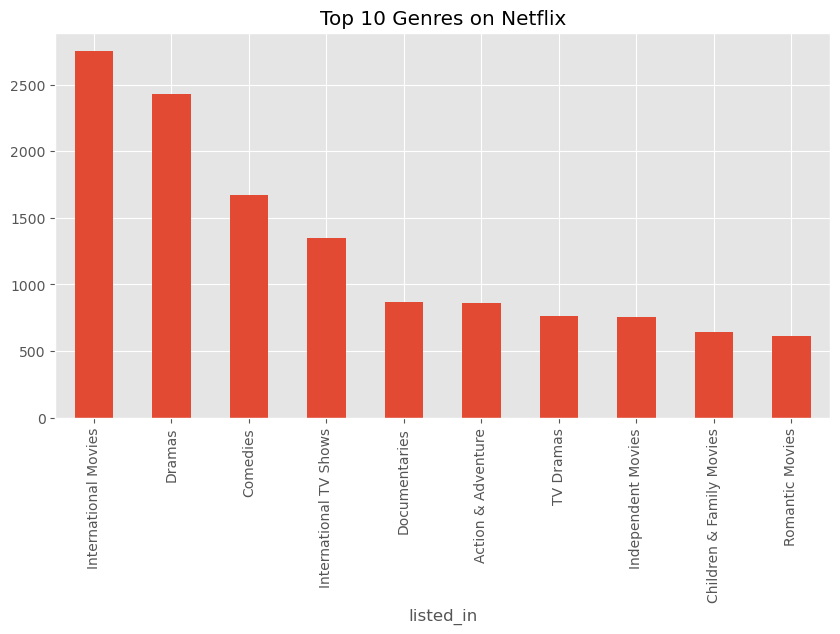

In [21]:
#Top Genres on Netflix
df['listed_in'] = df['listed_in'].str.split(", ")
genres = df.explode("listed_in")

top_genres = genres['listed_in'].value_counts().head(10)

plt.figure(figsize=(10,5))
top_genres.plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.show()

### Drama and International content dominate Netflix’s catalog.

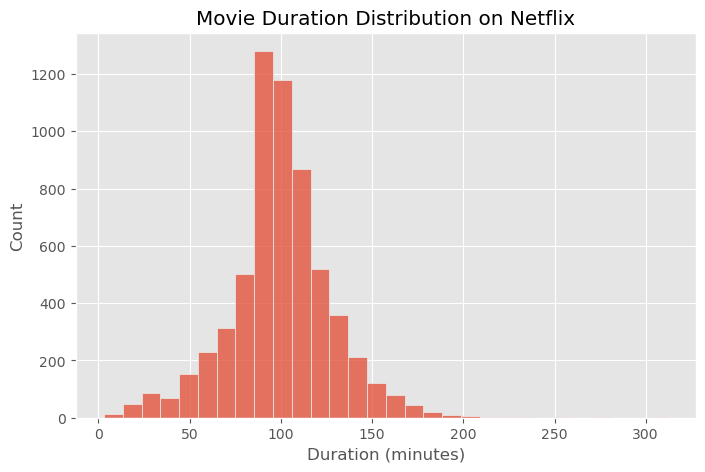

In [26]:
#Movies Duration Analysis
movies = df[df['type'] == "Movie"].copy()
movies = movies.dropna(subset=['duration'])
movies['duration_num'] = movies['duration'].str.replace(" min", "").astype(int)

plt.figure(figsize=(8,5))
sns.histplot(movies['duration_num'], bins=30)
plt.title("Movie Duration Distribution on Netflix")
plt.xlabel("Duration (minutes)")
plt.show()


### Most Netflix movies fall between 80–120 minutes.